Dimensionality Reduction Comparison
---
#### Method Testing
##### May 2019


Using discrete (`inputs/GSM1626793_P14Retina_1.digital_expression.csv.gz`, Mocosko, _et al_ 2015) and continuous (`inputs/qi_s1_edited_all.csv.gz`) datasets, downsample and feature select, then perform various DR techniques and compare the following:
* __Euclidean cell-cell distance__ correlations before and after transformation/reduction
* __Kullback-Leibler Divergence (KLD)__ explaining the Shannon entropy of the difference between the cumulative probability distributions of unique, normalized cell-cell distances.
* __K-nearest neighbor (Knn)__ preservation

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.


FIt-SNE repository not detected. Functionality will be disabled.


/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


---
#### Read in discrete dataset

In [2]:
P14Retina_0 = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.tsv', cells_axis=0, labels=[0,0])

In [3]:
# print cells x genes
P14Retina_0.data.shape

(1652, 500)

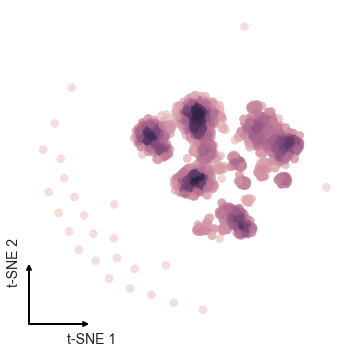

CPU times: user 20.1 s, sys: 91.6 ms, total: 20.1 s
Wall time: 20 s


In [4]:
%%time 
P14Retina_tSNE_05 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=5, seed=18) 
P14Retina_tSNE_05.plot()

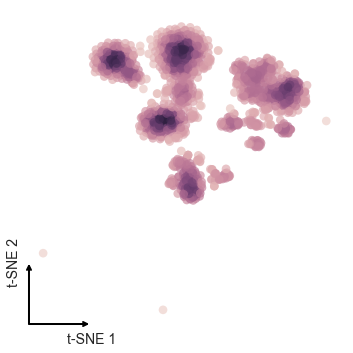

CPU times: user 21.6 s, sys: 110 ms, total: 21.7 s
Wall time: 21.6 s


In [5]:
%%time 
P14Retina_tSNE_10 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=10, seed=18) 
P14Retina_tSNE_10.plot()

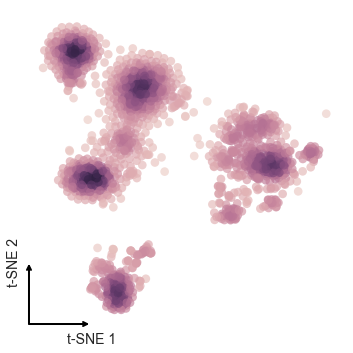

CPU times: user 24 s, sys: 134 ms, total: 24.2 s
Wall time: 24.1 s


In [6]:
%%time 
P14Retina_tSNE_30 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=30, seed=1) # use standard perplexity of 30 here
P14Retina_tSNE_30.plot()

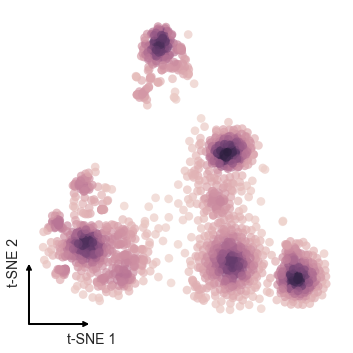

CPU times: user 27.8 s, sys: 1.16 s, total: 29 s
Wall time: 29 s


In [7]:
%%time 
P14Retina_tSNE_70 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=70, seed=18) 
P14Retina_tSNE_70.plot()

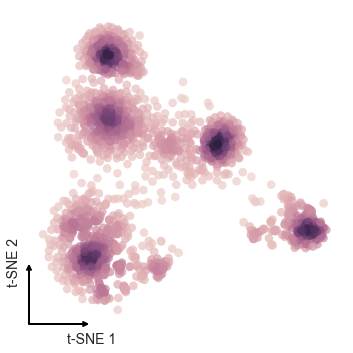

CPU times: user 31.6 s, sys: 798 ms, total: 32.4 s
Wall time: 32.3 s


In [8]:
%%time 
P14Retina_tSNE_100 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=100, seed=18) 
P14Retina_tSNE_100.plot()

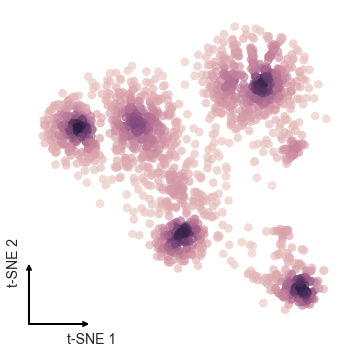

CPU times: user 43.8 s, sys: 2.21 s, total: 46 s
Wall time: 45.9 s


In [9]:
%%time 
P14Retina_tSNE_200 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=200, seed=18) 
P14Retina_tSNE_200.plot()

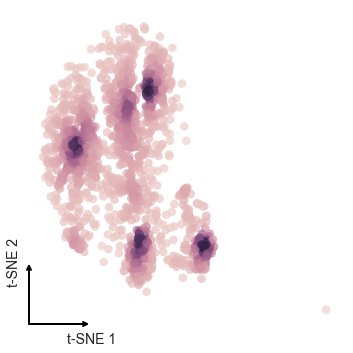

CPU times: user 1min 11s, sys: 5.22 s, total: 1min 16s
Wall time: 1min 19s


In [10]:
%%time 
P14Retina_tSNE_500 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=500, seed=18) 
P14Retina_tSNE_500.plot()

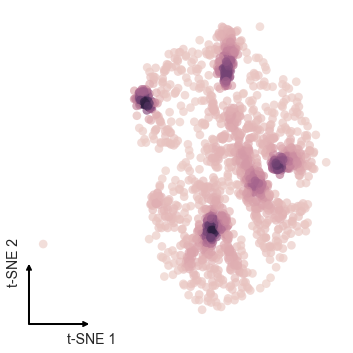

CPU times: user 56.1 s, sys: 3.93 s, total: 1min
Wall time: 1min 1s


In [11]:
%%time 
P14Retina_tSNE_1000 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=18) 
P14Retina_tSNE_1000.plot()

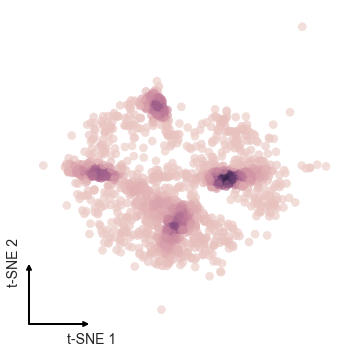

CPU times: user 55.1 s, sys: 3.81 s, total: 58.9 s
Wall time: 1min


In [12]:
%%time 
P14Retina_tSNE_1500 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=1500, seed=18) 
P14Retina_tSNE_1500.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

In [25]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [26]:
k = 30 # choose value for K-nearest neighbor calculations

R: 0.4235
EMD: 0.4427
KLD: 0.1494
Knn Pres.: 97.1117
CPU times: user 1min 9s, sys: 12.7 s, total: 1min 21s
Wall time: 1min 22s


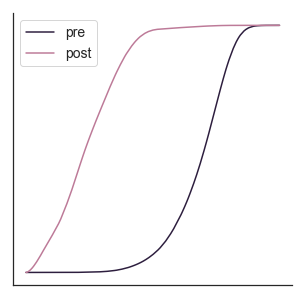

<Figure size 504x504 with 0 Axes>

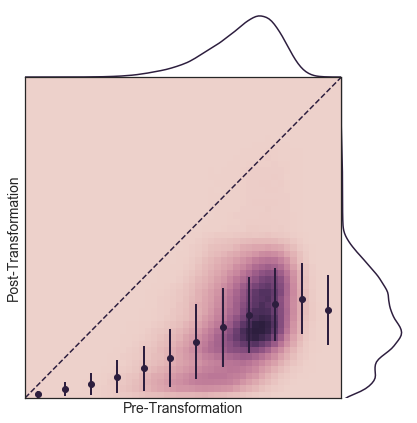

In [27]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_05.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_05.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 5'], final_distance_stats['Retina']['EMD']['t-SNE 5'], final_distance_stats['Retina']['KLD']['t-SNE 5'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.4562
EMD: 0.4085
KLD: 0.1516
Knn Pres.: 97.1525
CPU times: user 1min 9s, sys: 12.9 s, total: 1min 22s
Wall time: 1min 22s


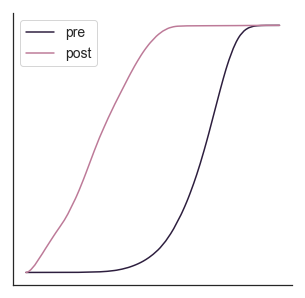

<Figure size 504x504 with 0 Axes>

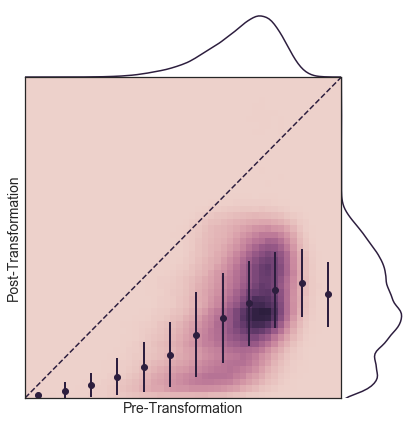

In [28]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_10.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_10.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 10'], final_distance_stats['Retina']['EMD']['t-SNE 10'], final_distance_stats['Retina']['KLD']['t-SNE 10'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.5266
EMD: 0.2742
KLD: 0.1654
Knn Pres.: 97.294
CPU times: user 1min 9s, sys: 13.1 s, total: 1min 22s
Wall time: 1min 23s


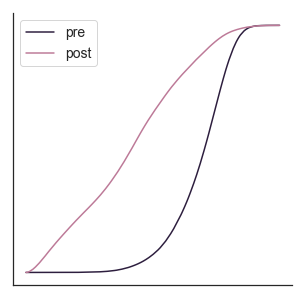

<Figure size 504x504 with 0 Axes>

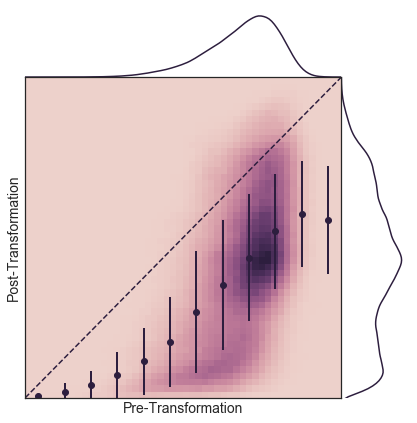

In [29]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_30.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_30.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 30'], final_distance_stats['Retina']['EMD']['t-SNE 30'], final_distance_stats['Retina']['KLD']['t-SNE 30'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.565
EMD: 0.2753
KLD: 0.1647
Knn Pres.: 97.4866
CPU times: user 1min 9s, sys: 13.2 s, total: 1min 22s
Wall time: 1min 23s


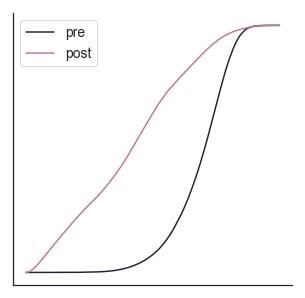

<Figure size 504x504 with 0 Axes>

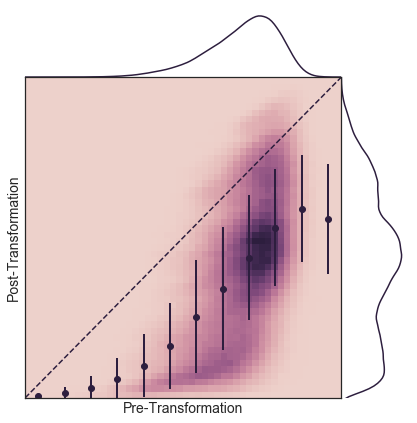

In [30]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_70.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_70.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 70'], final_distance_stats['Retina']['EMD']['t-SNE 70'], final_distance_stats['Retina']['KLD']['t-SNE 70'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.5743
EMD: 0.2723
KLD: 0.1609
Knn Pres.: 97.5566
CPU times: user 1min 9s, sys: 13 s, total: 1min 22s
Wall time: 1min 23s


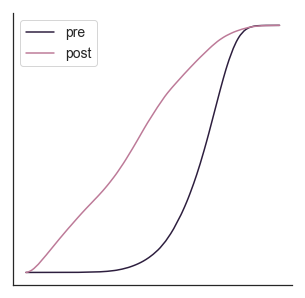

<Figure size 504x504 with 0 Axes>

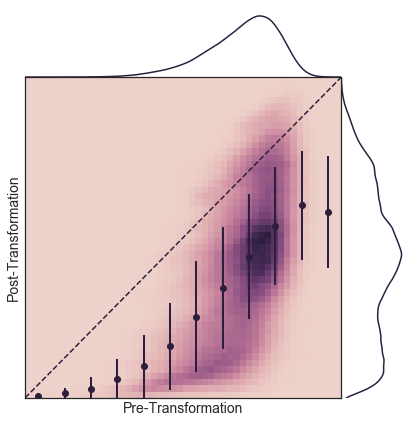

In [31]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_100.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_100.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 100'], final_distance_stats['Retina']['EMD']['t-SNE 100'], final_distance_stats['Retina']['KLD']['t-SNE 100'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.6117
EMD: 0.2841
KLD: 0.1482
Knn Pres.: 97.6833
CPU times: user 1min 10s, sys: 13.7 s, total: 1min 23s
Wall time: 1min 25s


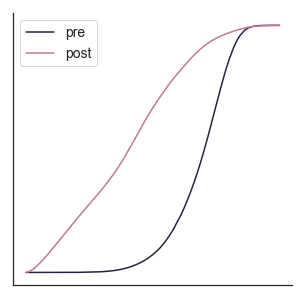

<Figure size 504x504 with 0 Axes>

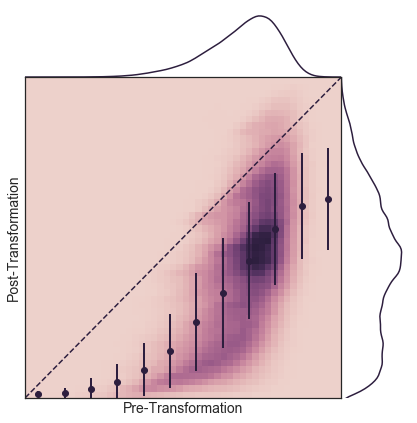

In [32]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_200.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_200.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 200'], final_distance_stats['Retina']['EMD']['t-SNE 200'], final_distance_stats['Retina']['KLD']['t-SNE 200'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.6551
EMD: 0.463
KLD: 0.1333
Knn Pres.: 97.9314
CPU times: user 1min 9s, sys: 13.6 s, total: 1min 23s
Wall time: 1min 24s


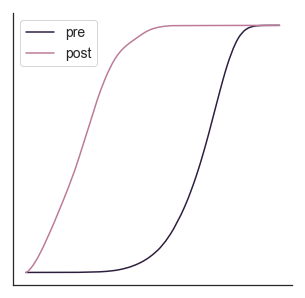

<Figure size 504x504 with 0 Axes>

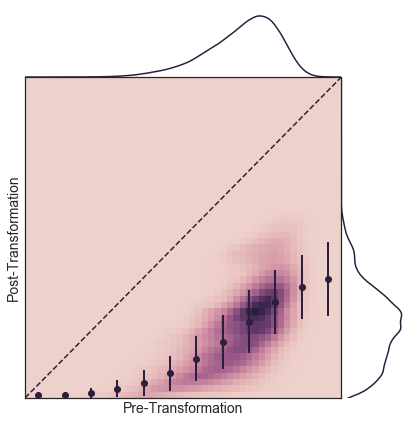

In [33]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 500'], final_distance_stats['Retina']['EMD']['t-SNE 500'], final_distance_stats['Retina']['KLD']['t-SNE 500'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.7368
EMD: 0.4179
KLD: 0.1169
Knn Pres.: 98.1894
CPU times: user 1min 8s, sys: 12.7 s, total: 1min 21s
Wall time: 1min 22s


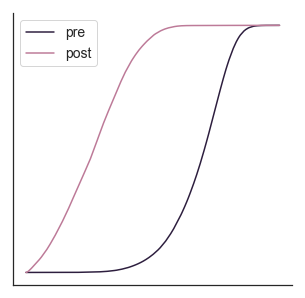

<Figure size 504x504 with 0 Axes>

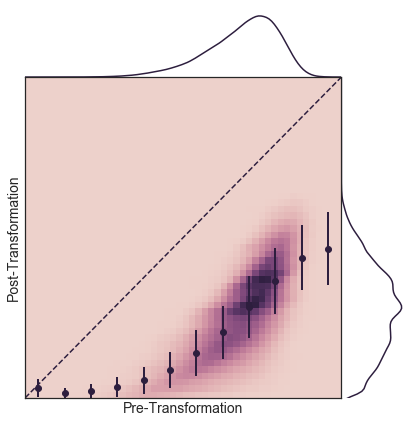

In [34]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_1000.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 1000'], final_distance_stats['Retina']['EMD']['t-SNE 1000'], final_distance_stats['Retina']['KLD']['t-SNE 1000'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 1000'] = mantel_stats[0], EMD, KLD, knn

R: 0.7498
EMD: 0.4437
KLD: 0.1224
Knn Pres.: 97.9807
CPU times: user 1min 8s, sys: 12.6 s, total: 1min 21s
Wall time: 1min 21s


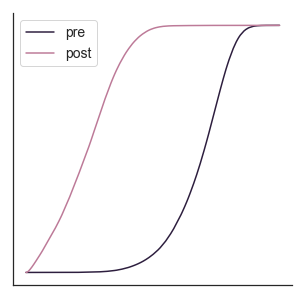

<Figure size 504x504 with 0 Axes>

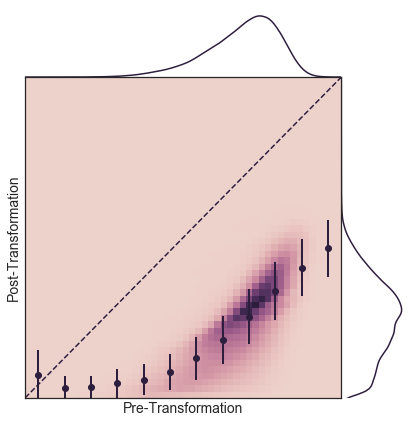

In [35]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_1500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_1500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE 1500'], final_distance_stats['Retina']['EMD']['t-SNE 1500'], final_distance_stats['Retina']['KLD']['t-SNE 1500'], final_distance_stats['Retina']['Knn Pres.']['t-SNE 1500'] = mantel_stats[0], EMD, KLD, knn

---
Now do the same thing with UMAP

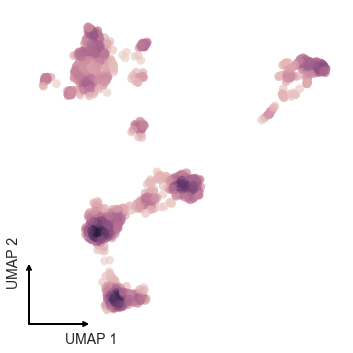

CPU times: user 9.15 s, sys: 521 ms, total: 9.67 s
Wall time: 9.35 s


In [36]:
%%time 
P14Retina_UMAP_05 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=5, seed=18) 
P14Retina_UMAP_05.plot()

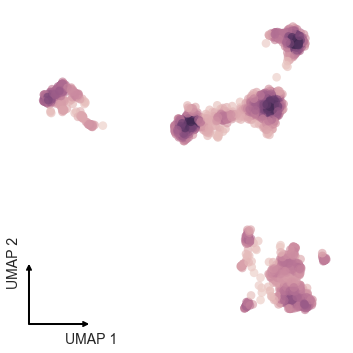

CPU times: user 5.74 s, sys: 389 ms, total: 6.13 s
Wall time: 5.52 s


In [37]:
%%time 
P14Retina_UMAP_10 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=10, seed=18) 
P14Retina_UMAP_10.plot()

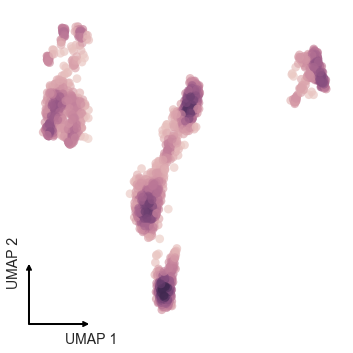

CPU times: user 8.07 s, sys: 406 ms, total: 8.47 s
Wall time: 7.88 s


In [38]:
%%time 
P14Retina_UMAP_30 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=30, seed=18) # use standard perplexity of 30 here
P14Retina_UMAP_30.plot()

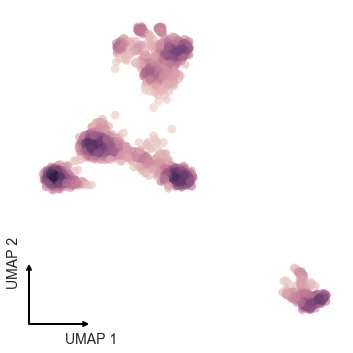

CPU times: user 11 s, sys: 447 ms, total: 11.5 s
Wall time: 10.9 s


In [39]:
%%time 
P14Retina_UMAP_70 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=70, seed=18) 
P14Retina_UMAP_70.plot()

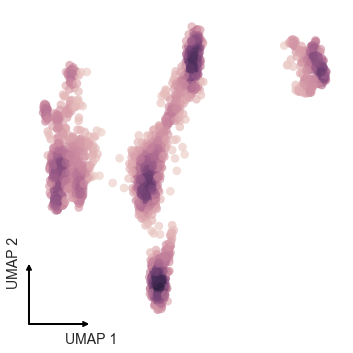

CPU times: user 10.9 s, sys: 463 ms, total: 11.3 s
Wall time: 10.8 s


In [40]:
%%time 
P14Retina_UMAP_100 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=100, seed=18) 
P14Retina_UMAP_100.plot()

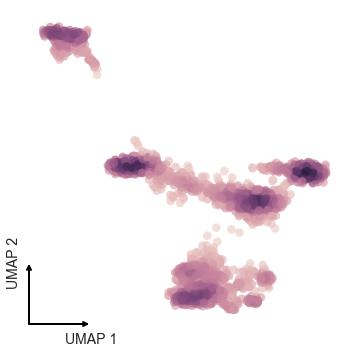

CPU times: user 12.4 s, sys: 457 ms, total: 12.9 s
Wall time: 12.3 s


In [41]:
%%time 
P14Retina_UMAP_200 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=200, seed=18) 
P14Retina_UMAP_200.plot()

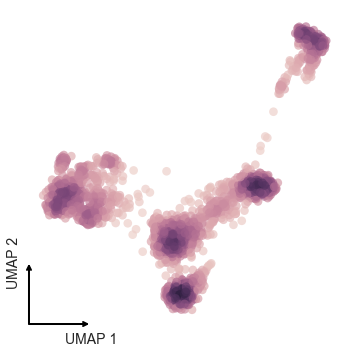

CPU times: user 15.2 s, sys: 653 ms, total: 15.8 s
Wall time: 15.4 s


In [42]:
%%time 
P14Retina_UMAP_500 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=500, seed=18) 
P14Retina_UMAP_500.plot()

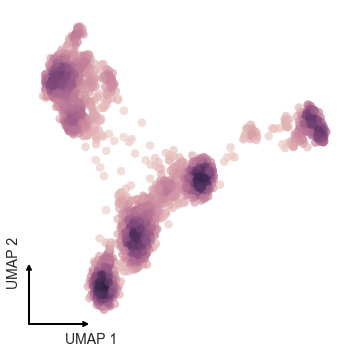

CPU times: user 17.7 s, sys: 770 ms, total: 18.4 s
Wall time: 18.1 s


In [43]:
%%time 
P14Retina_UMAP_1000 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=18) 
P14Retina_UMAP_1000.plot()

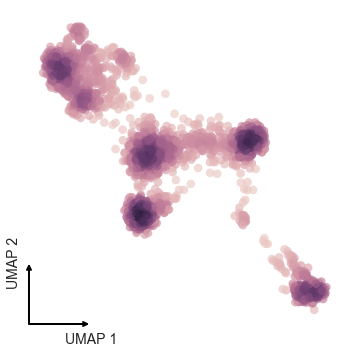

CPU times: user 18.7 s, sys: 947 ms, total: 19.6 s
Wall time: 19.1 s


In [44]:
%%time 
P14Retina_UMAP_1500 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=1500, seed=18) 
P14Retina_UMAP_1500.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.4912
EMD: 0.269
KLD: 0.2399
Knn Pres.: 97.0977
CPU times: user 1min 8s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 21s


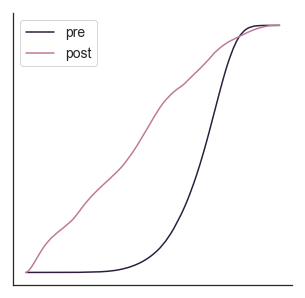

<Figure size 504x504 with 0 Axes>

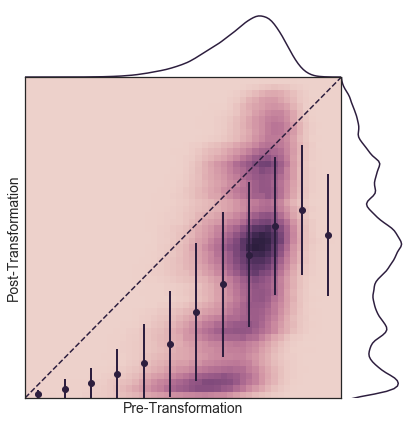

In [45]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_05.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_05.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 5'], final_distance_stats['Retina']['EMD']['UMAP 5'], final_distance_stats['Retina']['KLD']['UMAP 5'], final_distance_stats['Retina']['Knn Pres.']['UMAP 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.506
EMD: 0.2874
KLD: 0.2626
Knn Pres.: 97.1327
CPU times: user 1min 7s, sys: 11.8 s, total: 1min 19s
Wall time: 1min 19s


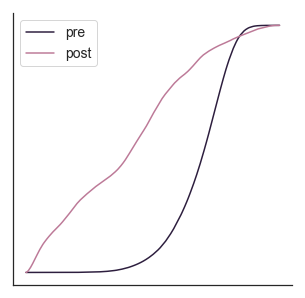

<Figure size 504x504 with 0 Axes>

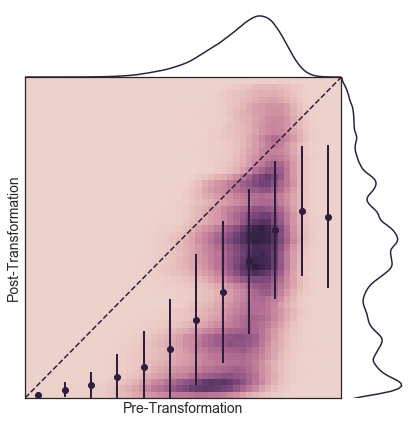

In [46]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_10.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_10.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 10'], final_distance_stats['Retina']['EMD']['UMAP 10'], final_distance_stats['Retina']['KLD']['UMAP 10'], final_distance_stats['Retina']['Knn Pres.']['UMAP 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.5238
EMD: 0.3376
KLD: 0.2896
Knn Pres.: 97.1521
CPU times: user 1min 7s, sys: 11.9 s, total: 1min 19s
Wall time: 1min 20s


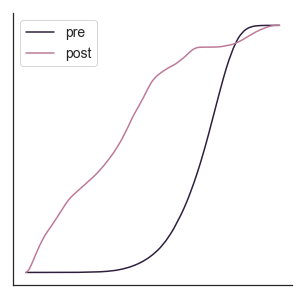

<Figure size 504x504 with 0 Axes>

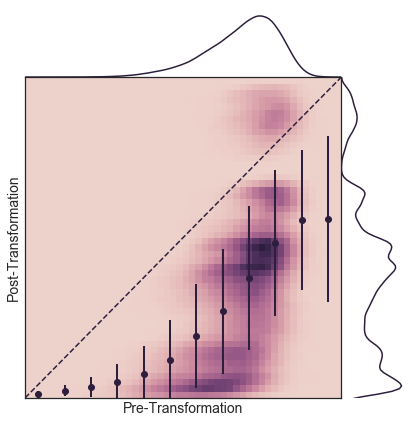

In [47]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_30.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_30.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 30'], final_distance_stats['Retina']['EMD']['UMAP 30'], final_distance_stats['Retina']['KLD']['UMAP 30'], final_distance_stats['Retina']['Knn Pres.']['UMAP 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.5305
EMD: 0.321
KLD: 0.2793
Knn Pres.: 97.1527
CPU times: user 1min 7s, sys: 12 s, total: 1min 19s
Wall time: 1min 20s


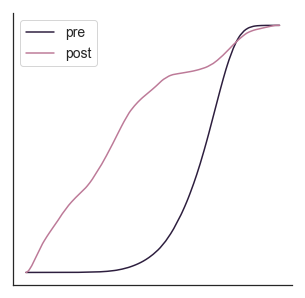

<Figure size 504x504 with 0 Axes>

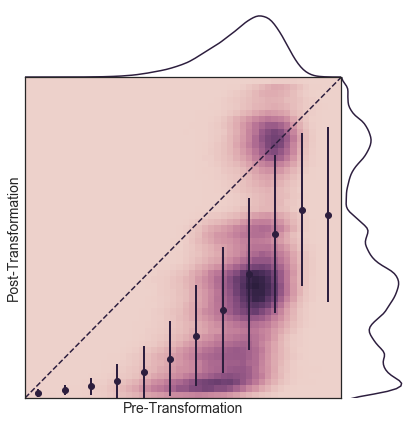

In [48]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_70.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_70.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 70'], final_distance_stats['Retina']['EMD']['UMAP 70'], final_distance_stats['Retina']['KLD']['UMAP 70'], final_distance_stats['Retina']['Knn Pres.']['UMAP 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.5357
EMD: 0.355
KLD: 0.2805
Knn Pres.: 97.1443
CPU times: user 1min 9s, sys: 13 s, total: 1min 22s
Wall time: 1min 25s


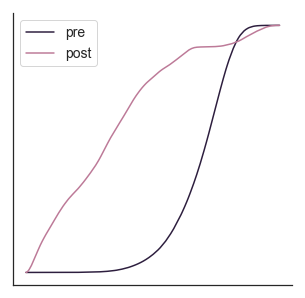

<Figure size 504x504 with 0 Axes>

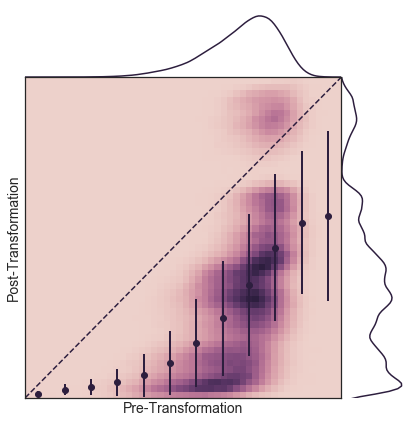

In [49]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_100.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_100.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 100'], final_distance_stats['Retina']['EMD']['UMAP 100'], final_distance_stats['Retina']['KLD']['UMAP 100'], final_distance_stats['Retina']['Knn Pres.']['UMAP 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.536
EMD: 0.3496
KLD: 0.2644
Knn Pres.: 97.1536
CPU times: user 1min 8s, sys: 12.7 s, total: 1min 21s
Wall time: 1min 22s


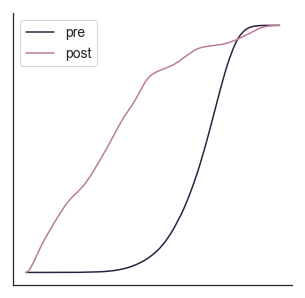

<Figure size 504x504 with 0 Axes>

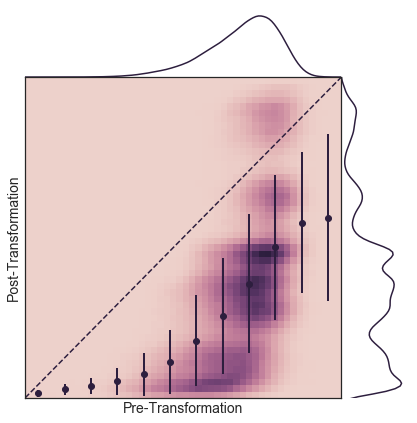

In [50]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_200.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_200.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 200'], final_distance_stats['Retina']['EMD']['UMAP 200'], final_distance_stats['Retina']['KLD']['UMAP 200'], final_distance_stats['Retina']['Knn Pres.']['UMAP 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.5604
EMD: 0.305
KLD: 0.2307
Knn Pres.: 97.1669
CPU times: user 1min 8s, sys: 12.1 s, total: 1min 20s
Wall time: 1min 22s


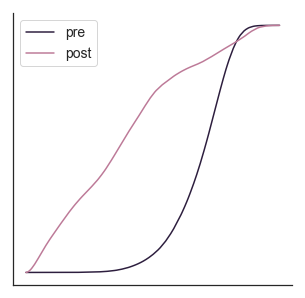

<Figure size 504x504 with 0 Axes>

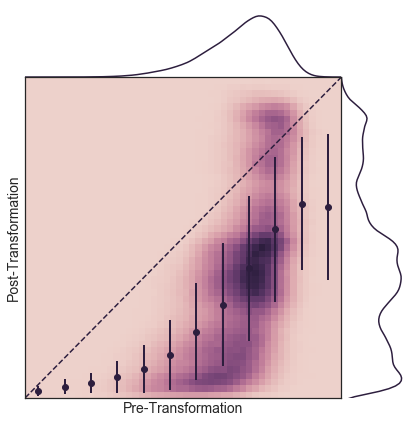

In [51]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 500'], final_distance_stats['Retina']['EMD']['UMAP 500'], final_distance_stats['Retina']['KLD']['UMAP 500'], final_distance_stats['Retina']['Knn Pres.']['UMAP 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.5398
EMD: 0.3259
KLD: 0.2376
Knn Pres.: 97.138
CPU times: user 1min 8s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 20s


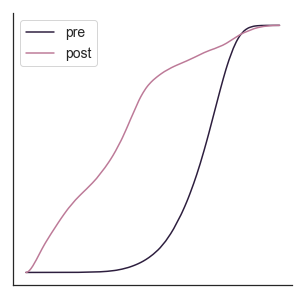

<Figure size 504x504 with 0 Axes>

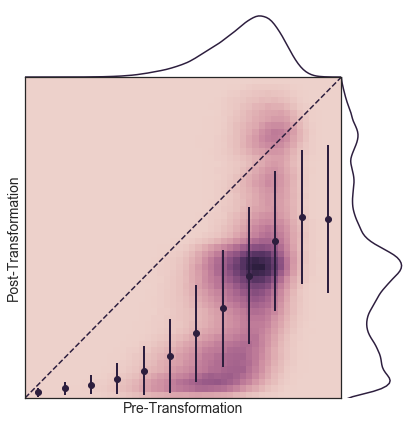

In [52]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_1000.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 1000'], final_distance_stats['Retina']['EMD']['UMAP 1000'], final_distance_stats['Retina']['KLD']['UMAP 1000'], final_distance_stats['Retina']['Knn Pres.']['UMAP 1000'] = mantel_stats[0], EMD, KLD, knn

R: 0.5383
EMD: 0.3519
KLD: 0.218
Knn Pres.: 97.15
CPU times: user 1min 7s, sys: 11.7 s, total: 1min 19s
Wall time: 1min 19s


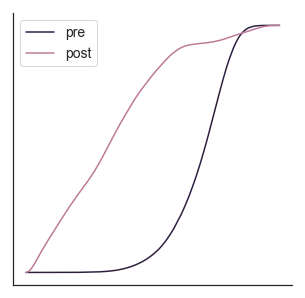

<Figure size 504x504 with 0 Axes>

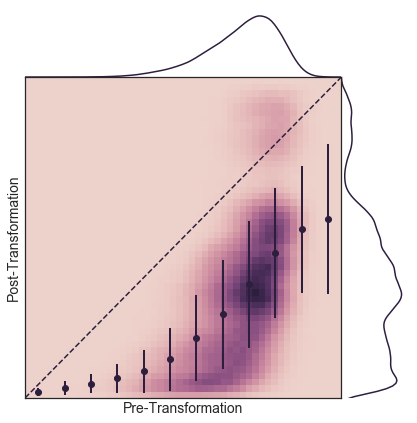

In [53]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_1500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_1500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP 1500'], final_distance_stats['Retina']['EMD']['UMAP 1500'], final_distance_stats['Retina']['KLD']['UMAP 1500'], final_distance_stats['Retina']['Knn Pres.']['UMAP 1500'] = mantel_stats[0], EMD, KLD, knn

---
## Colon Dataset

In [56]:
%time qi = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv', cells_axis=0, labels=[0,0])

CPU times: user 139 ms, sys: 25.5 ms, total: 164 ms
Wall time: 174 ms


In [57]:
# cells x genes
qi.data.shape

(1653, 500)

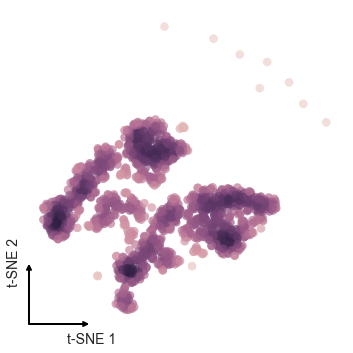

CPU times: user 21.8 s, sys: 167 ms, total: 22 s
Wall time: 22.1 s


In [58]:
%%time 
qi_tSNE_05 = fcc_tSNE(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_tSNE_05.plot()

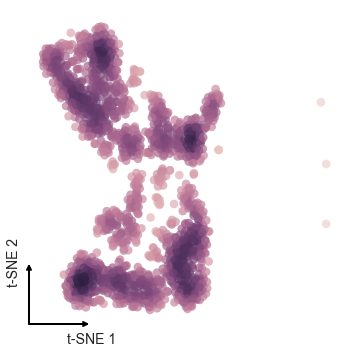

CPU times: user 23.7 s, sys: 403 ms, total: 24.2 s
Wall time: 24.3 s


In [59]:
%%time 
qi_tSNE_10 = fcc_tSNE(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_tSNE_10.plot()

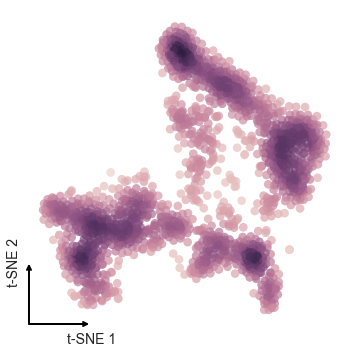

CPU times: user 25.4 s, sys: 310 ms, total: 25.7 s
Wall time: 25.7 s


In [60]:
%%time 
qi_tSNE_30 = fcc_tSNE(qi.arcsinh_norm(), perplexity=30, seed=12)
qi_tSNE_30.plot()

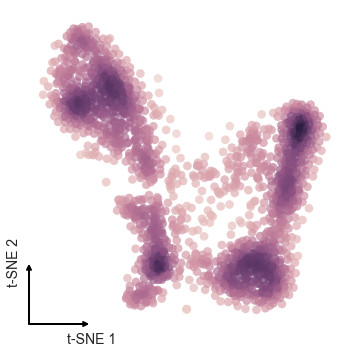

CPU times: user 29.5 s, sys: 1.41 s, total: 30.9 s
Wall time: 31.3 s


In [61]:
%%time 
qi_tSNE_70 = fcc_tSNE(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_tSNE_70.plot()

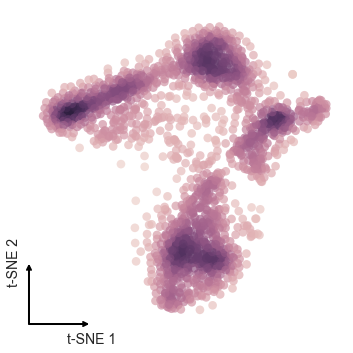

CPU times: user 33.8 s, sys: 1.13 s, total: 34.9 s
Wall time: 35.4 s


In [62]:
%%time 
qi_tSNE_100 = fcc_tSNE(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_tSNE_100.plot()

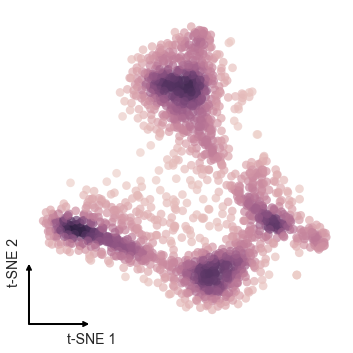

CPU times: user 39.7 s, sys: 2.1 s, total: 41.8 s
Wall time: 42 s


In [63]:
%%time 
qi_tSNE_200 = fcc_tSNE(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_tSNE_200.plot()

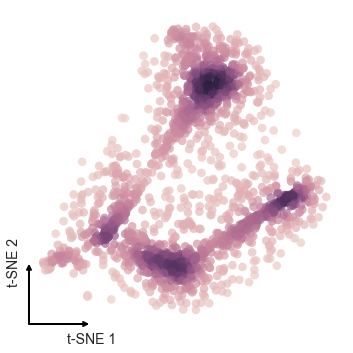

CPU times: user 1min 8s, sys: 5.18 s, total: 1min 13s
Wall time: 1min 14s


In [64]:
%%time 
qi_tSNE_500 = fcc_tSNE(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_tSNE_500.plot()

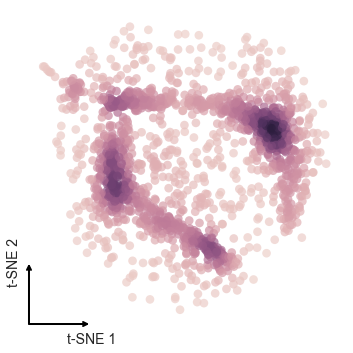

CPU times: user 1min 2s, sys: 4 s, total: 1min 6s
Wall time: 1min 6s


In [65]:
%%time 
qi_tSNE_1000 = fcc_tSNE(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_tSNE_1000.plot()

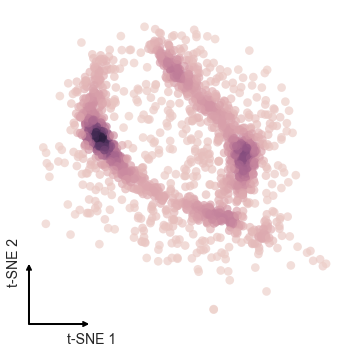

CPU times: user 52.3 s, sys: 3.29 s, total: 55.6 s
Wall time: 55.4 s


In [66]:
%%time 
qi_tSNE_1500 = fcc_tSNE(qi.arcsinh_norm(), perplexity=1500, seed=18) 
qi_tSNE_1500.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.5458
EMD: 0.2086
KLD: 0.1056
Knn Pres.: 97.4676
CPU times: user 1min 8s, sys: 11.7 s, total: 1min 19s
Wall time: 1min 19s


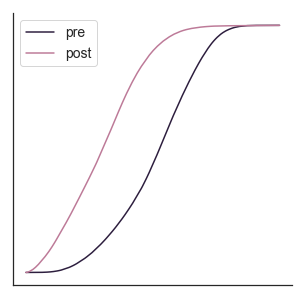

<Figure size 504x504 with 0 Axes>

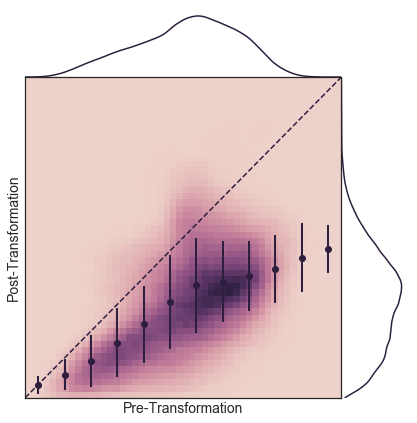

In [67]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_05.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_05.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 5'], final_distance_stats['Colon']['EMD']['t-SNE 5'], final_distance_stats['Colon']['KLD']['t-SNE 5'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.7318
EMD: 0.2231
KLD: 0.0848
Knn Pres.: 97.5485
CPU times: user 1min 8s, sys: 11.8 s, total: 1min 19s
Wall time: 1min 19s


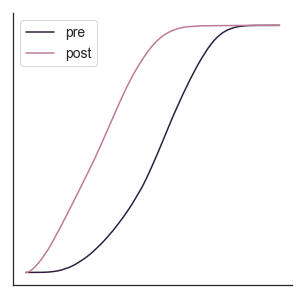

<Figure size 504x504 with 0 Axes>

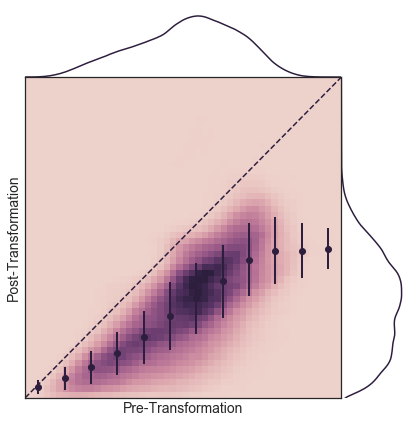

In [68]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_10.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_10.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 10'], final_distance_stats['Colon']['EMD']['t-SNE 10'], final_distance_stats['Colon']['KLD']['t-SNE 10'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.7469
EMD: 0.1146
KLD: 0.0872
Knn Pres.: 97.6884
CPU times: user 1min 8s, sys: 12.1 s, total: 1min 20s
Wall time: 1min 20s


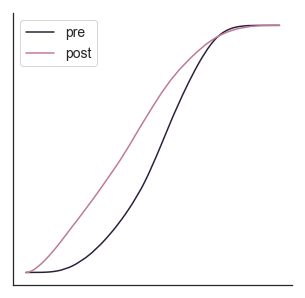

<Figure size 504x504 with 0 Axes>

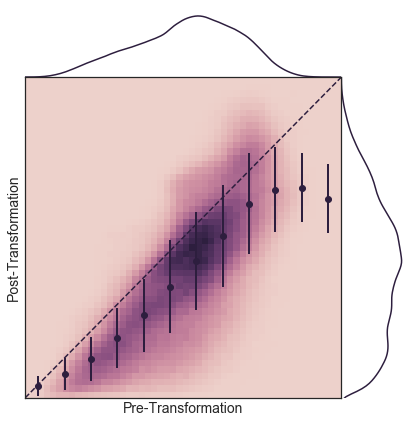

In [69]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_30.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_30.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 30'], final_distance_stats['Colon']['EMD']['t-SNE 30'], final_distance_stats['Colon']['KLD']['t-SNE 30'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.7496
EMD: 0.1189
KLD: 0.0903
Knn Pres.: 97.8458
CPU times: user 1min 8s, sys: 12.1 s, total: 1min 20s
Wall time: 1min 20s


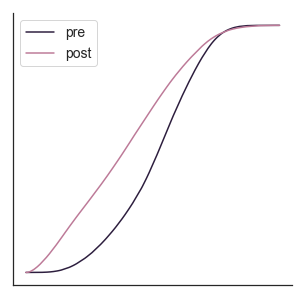

<Figure size 504x504 with 0 Axes>

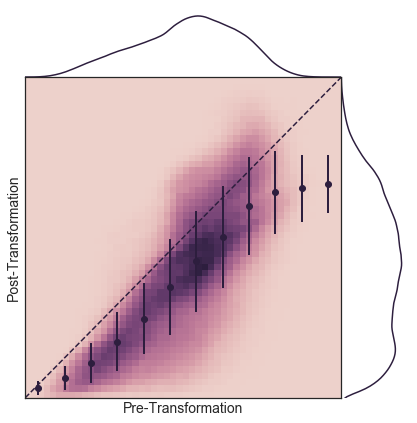

In [70]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_70.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_70.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 70'], final_distance_stats['Colon']['EMD']['t-SNE 70'], final_distance_stats['Colon']['KLD']['t-SNE 70'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.7548
EMD: 0.117
KLD: 0.0896
Knn Pres.: 97.9191
CPU times: user 1min 7s, sys: 12 s, total: 1min 19s
Wall time: 1min 19s


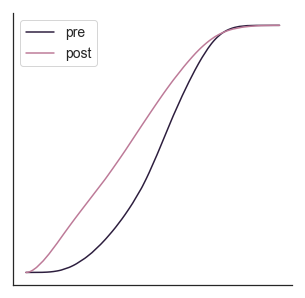

<Figure size 504x504 with 0 Axes>

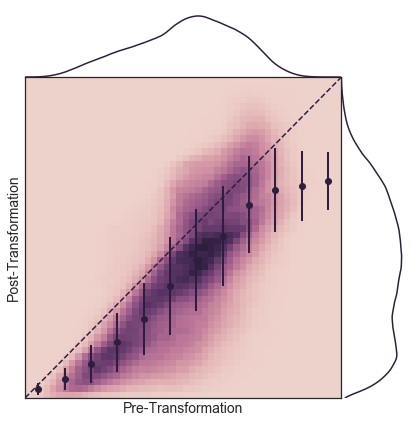

In [71]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_100.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_100.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 100'], final_distance_stats['Colon']['EMD']['t-SNE 100'], final_distance_stats['Colon']['KLD']['t-SNE 100'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.7742
EMD: 0.1223
KLD: 0.0877
Knn Pres.: 98.0598
CPU times: user 1min 8s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 20s


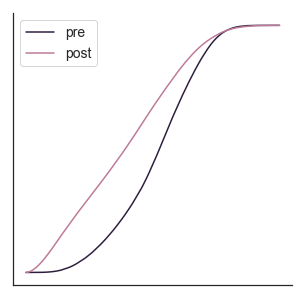

<Figure size 504x504 with 0 Axes>

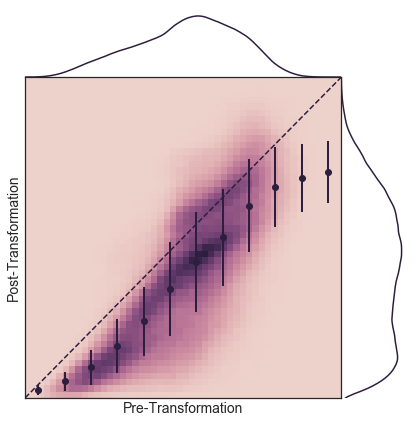

In [72]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_200.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_200.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 200'], final_distance_stats['Colon']['EMD']['t-SNE 200'], final_distance_stats['Colon']['KLD']['t-SNE 200'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.8347
EMD: 0.1292
KLD: 0.0759
Knn Pres.: 98.2476
CPU times: user 1min 8s, sys: 12.4 s, total: 1min 20s
Wall time: 1min 21s


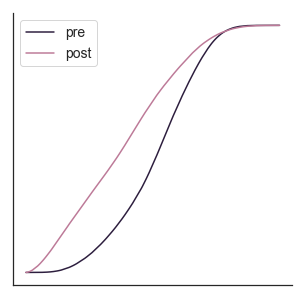

<Figure size 504x504 with 0 Axes>

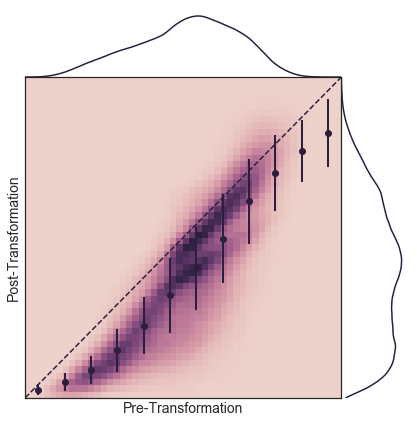

In [73]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 500'], final_distance_stats['Colon']['EMD']['t-SNE 500'], final_distance_stats['Colon']['KLD']['t-SNE 500'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.8807
EMD: 0.1676
KLD: 0.0617
Knn Pres.: 98.4605
CPU times: user 1min 8s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 20s


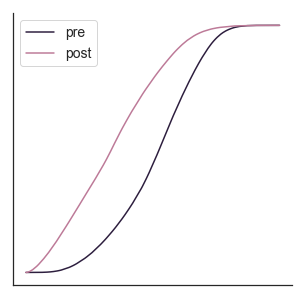

<Figure size 504x504 with 0 Axes>

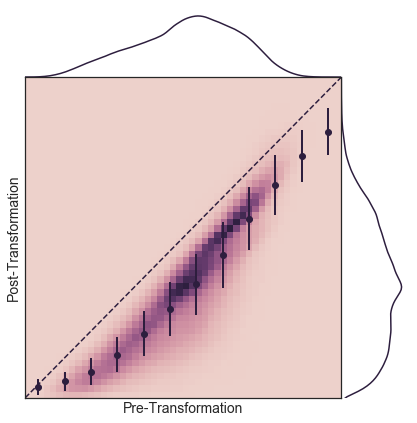

In [74]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_1000.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 1000'], final_distance_stats['Colon']['EMD']['t-SNE 1000'], final_distance_stats['Colon']['KLD']['t-SNE 1000'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 1000'] = mantel_stats[0], EMD, KLD, knn

R: 0.8746
EMD: 0.2021
KLD: 0.0649
Knn Pres.: 98.3856
CPU times: user 1min 8s, sys: 12.4 s, total: 1min 21s
Wall time: 1min 21s


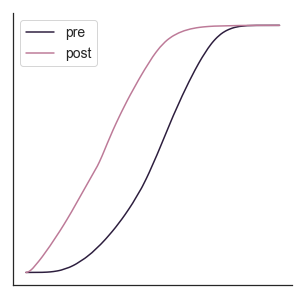

<Figure size 504x504 with 0 Axes>

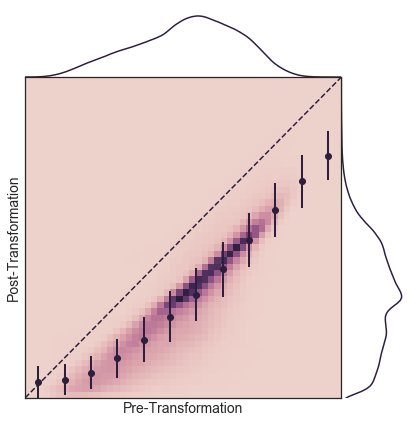

In [75]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_1500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_1500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE 1500'], final_distance_stats['Colon']['EMD']['t-SNE 1500'], final_distance_stats['Colon']['KLD']['t-SNE 1500'], final_distance_stats['Colon']['Knn Pres.']['t-SNE 1500'] = mantel_stats[0], EMD, KLD, knn

---
Now do the same thing with UMAP

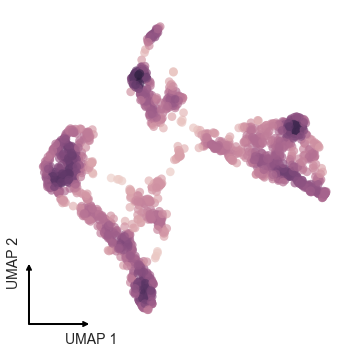

CPU times: user 4.33 s, sys: 367 ms, total: 4.7 s
Wall time: 4.05 s


In [76]:
%%time 
qi_UMAP_05 = fcc_UMAP(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_UMAP_05.plot()

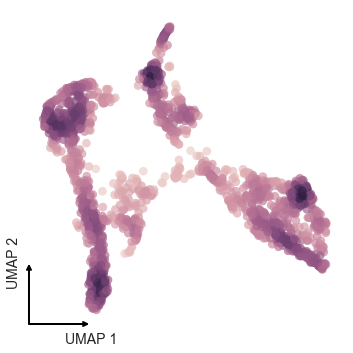

CPU times: user 5.6 s, sys: 371 ms, total: 5.97 s
Wall time: 5.32 s


In [77]:
%%time 
qi_UMAP_10 = fcc_UMAP(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_UMAP_10.plot()

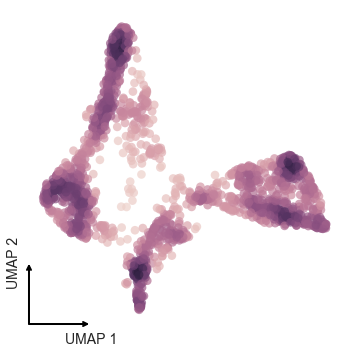

CPU times: user 7.91 s, sys: 379 ms, total: 8.29 s
Wall time: 7.65 s


In [78]:
%%time 
qi_UMAP_30 = fcc_UMAP(qi.arcsinh_norm(), perplexity=30, seed=12)
qi_UMAP_30.plot()

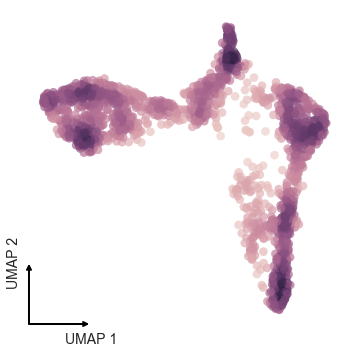

CPU times: user 9.6 s, sys: 392 ms, total: 9.99 s
Wall time: 9.34 s


In [79]:
%%time 
qi_UMAP_70 = fcc_UMAP(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_UMAP_70.plot()

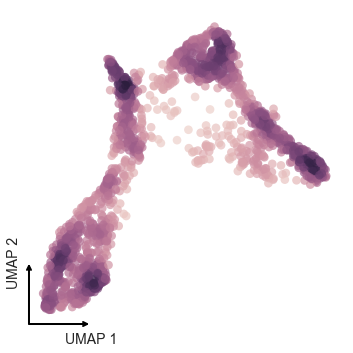

CPU times: user 10.4 s, sys: 399 ms, total: 10.8 s
Wall time: 10.2 s


In [80]:
%%time 
qi_UMAP_100 = fcc_UMAP(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_UMAP_100.plot()

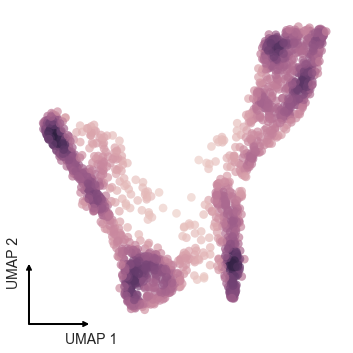

CPU times: user 12.1 s, sys: 500 ms, total: 12.6 s
Wall time: 12 s


In [81]:
%%time 
qi_UMAP_200 = fcc_UMAP(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_UMAP_200.plot()

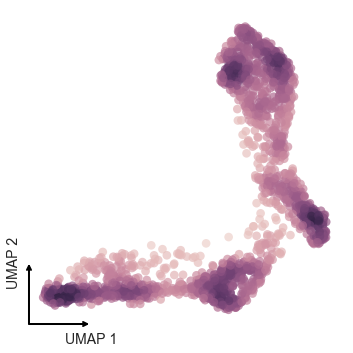

CPU times: user 14.5 s, sys: 559 ms, total: 15 s
Wall time: 14.4 s


In [82]:
%%time 
qi_UMAP_500 = fcc_UMAP(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_UMAP_500.plot()

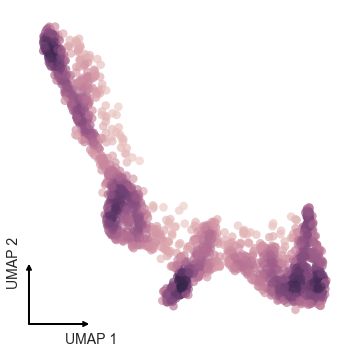

CPU times: user 16.7 s, sys: 642 ms, total: 17.3 s
Wall time: 16.7 s


In [83]:
%%time 
qi_UMAP_1000 = fcc_UMAP(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_UMAP_1000.plot()

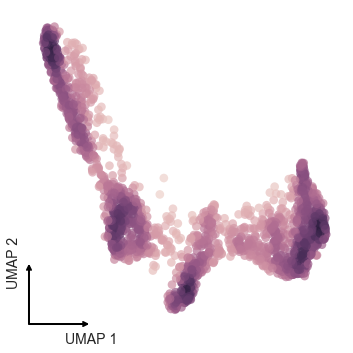

CPU times: user 18.1 s, sys: 766 ms, total: 18.9 s
Wall time: 18.2 s


In [84]:
%%time 
qi_UMAP_1500 = fcc_UMAP(qi.arcsinh_norm(), perplexity=1500, seed=18) 
qi_UMAP_1500.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.7297
EMD: 0.1035
KLD: 0.1156
Knn Pres.: 97.5284
CPU times: user 1min 7s, sys: 11.4 s, total: 1min 18s
Wall time: 1min 18s


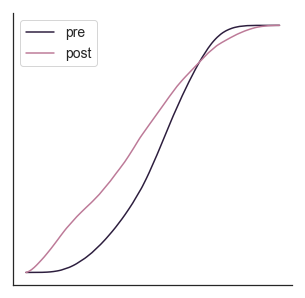

<Figure size 504x504 with 0 Axes>

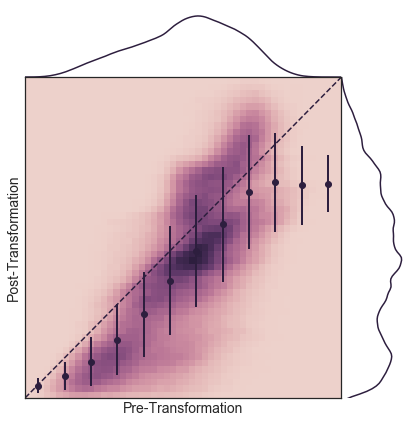

In [85]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_05.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_05.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 5'], final_distance_stats['Colon']['EMD']['UMAP 5'], final_distance_stats['Colon']['KLD']['UMAP 5'], final_distance_stats['Colon']['Knn Pres.']['UMAP 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.7297
EMD: 0.1092
KLD: 0.1175
Knn Pres.: 97.5912
CPU times: user 1min 8s, sys: 12.3 s, total: 1min 20s
Wall time: 1min 20s


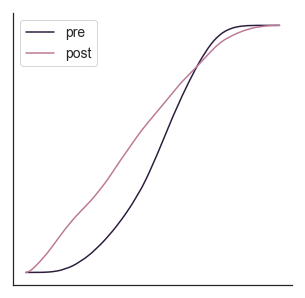

<Figure size 504x504 with 0 Axes>

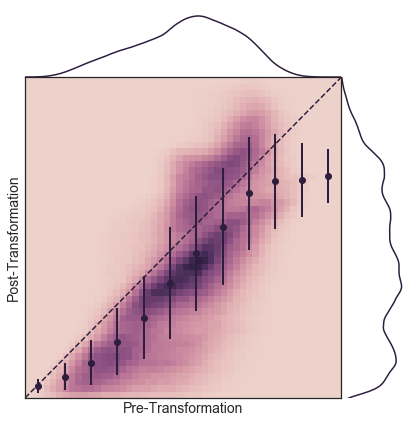

In [86]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_10.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_10.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 10'], final_distance_stats['Colon']['EMD']['UMAP 10'], final_distance_stats['Colon']['KLD']['UMAP 10'], final_distance_stats['Colon']['Knn Pres.']['UMAP 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.7215
EMD: 0.0977
KLD: 0.1119
Knn Pres.: 97.6149
CPU times: user 1min 7s, sys: 12.3 s, total: 1min 20s
Wall time: 1min 20s


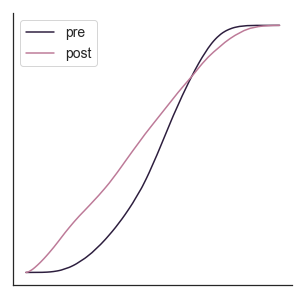

<Figure size 504x504 with 0 Axes>

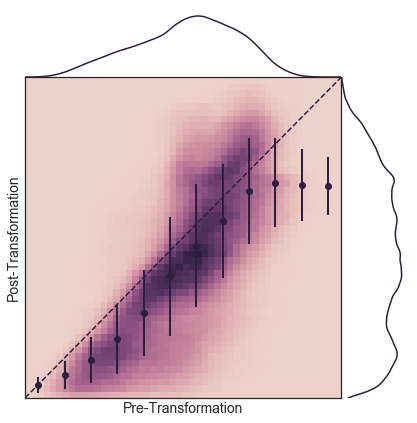

In [87]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_30.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_30.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 30'], final_distance_stats['Colon']['EMD']['UMAP 30'], final_distance_stats['Colon']['KLD']['UMAP 30'], final_distance_stats['Colon']['Knn Pres.']['UMAP 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.6668
EMD: 0.1106
KLD: 0.1364
Knn Pres.: 97.6053
CPU times: user 1min 7s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 19s


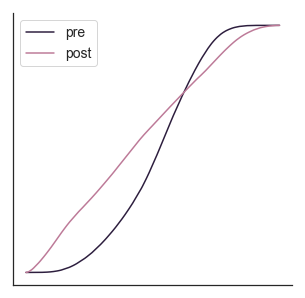

<Figure size 504x504 with 0 Axes>

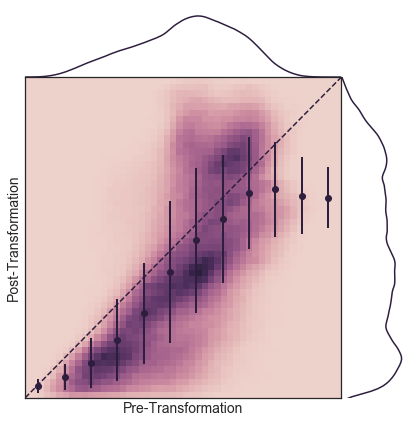

In [88]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_70.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_70.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 70'], final_distance_stats['Colon']['EMD']['UMAP 70'], final_distance_stats['Colon']['KLD']['UMAP 70'], final_distance_stats['Colon']['Knn Pres.']['UMAP 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.6712
EMD: 0.1076
KLD: 0.1342
Knn Pres.: 97.6098
CPU times: user 1min 25s, sys: 15.7 s, total: 1min 40s
Wall time: 1min 42s


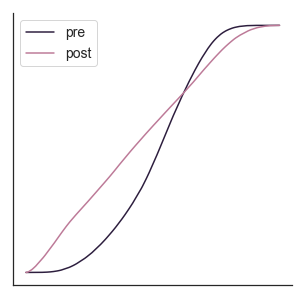

<Figure size 504x504 with 0 Axes>

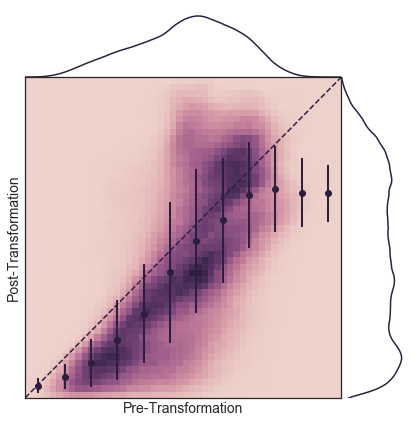

In [89]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_100.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_100.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 100'], final_distance_stats['Colon']['EMD']['UMAP 100'], final_distance_stats['Colon']['KLD']['UMAP 100'], final_distance_stats['Colon']['Knn Pres.']['UMAP 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.6663
EMD: 0.1049
KLD: 0.1339
Knn Pres.: 97.5957
CPU times: user 1min 27s, sys: 16.2 s, total: 1min 43s
Wall time: 1min 44s


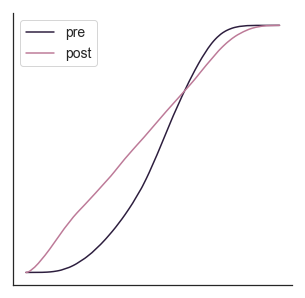

<Figure size 504x504 with 0 Axes>

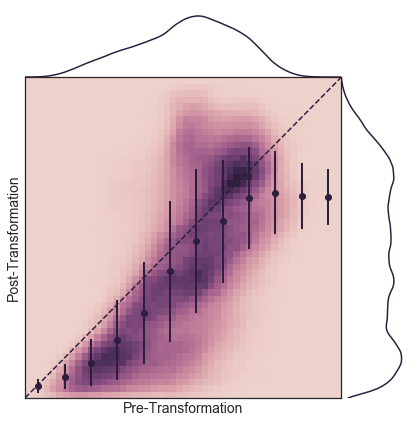

In [90]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_200.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_200.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 200'], final_distance_stats['Colon']['EMD']['UMAP 200'], final_distance_stats['Colon']['KLD']['UMAP 200'], final_distance_stats['Colon']['Knn Pres.']['UMAP 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.6246
EMD: 0.1118
KLD: 0.1513
Knn Pres.: 97.596
CPU times: user 1min 27s, sys: 16.7 s, total: 1min 43s
Wall time: 1min 44s


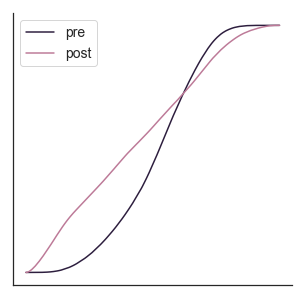

<Figure size 504x504 with 0 Axes>

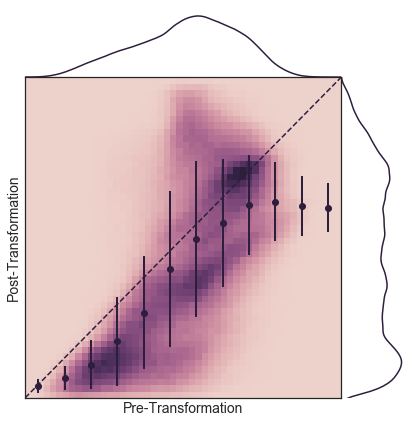

In [91]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 500'], final_distance_stats['Colon']['EMD']['UMAP 500'], final_distance_stats['Colon']['KLD']['UMAP 500'], final_distance_stats['Colon']['Knn Pres.']['UMAP 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.5402
EMD: 0.1542
KLD: 0.1956
Knn Pres.: 97.4829
CPU times: user 1min 26s, sys: 15.6 s, total: 1min 42s
Wall time: 1min 43s


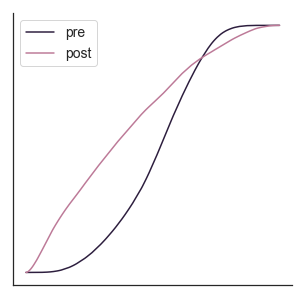

<Figure size 504x504 with 0 Axes>

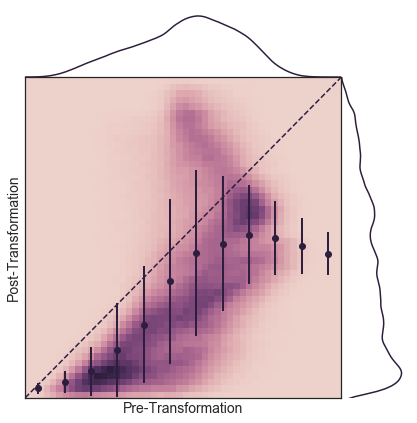

In [92]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_1000.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 1000'], final_distance_stats['Colon']['EMD']['UMAP 1000'], final_distance_stats['Colon']['KLD']['UMAP 1000'], final_distance_stats['Colon']['Knn Pres.']['UMAP 1000'] = mantel_stats[0], EMD, KLD, knn

R: 0.5468
EMD: 0.1484
KLD: 0.1962
Knn Pres.: 97.4973
CPU times: user 1min 26s, sys: 15.8 s, total: 1min 42s
Wall time: 1min 43s


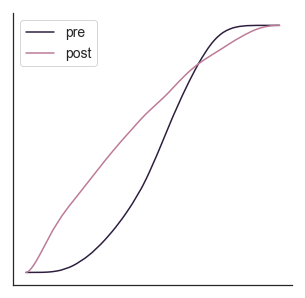

<Figure size 504x504 with 0 Axes>

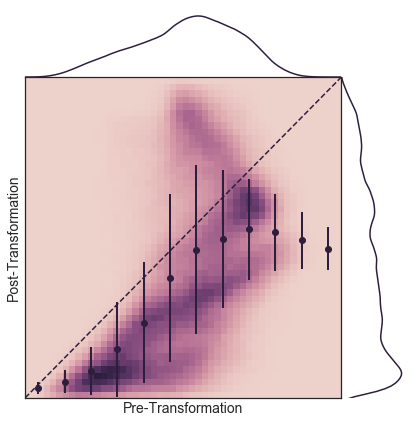

In [93]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_1500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_1500.knn_graph(k))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP 1500'], final_distance_stats['Colon']['EMD']['UMAP 1500'], final_distance_stats['Colon']['KLD']['UMAP 1500'], final_distance_stats['Colon']['Knn Pres.']['UMAP 1500'] = mantel_stats[0], EMD, KLD, knn

---
### Aggregate summary metrics

In [94]:
final_distance_stats

{'Retina': {'R': {'t-SNE 5': 0.42347335555577503,
   't-SNE 10': 0.4562263478543867,
   't-SNE 30': 0.5266478444327192,
   't-SNE 70': 0.5649654232810324,
   't-SNE 100': 0.5742587421568343,
   't-SNE 200': 0.6117431489463673,
   't-SNE 500': 0.6551306552004281,
   't-SNE 1000': 0.7367743162625434,
   't-SNE 1500': 0.7497548420427725,
   'UMAP 5': 0.49116480667432544,
   'UMAP 10': 0.5060297003736696,
   'UMAP 30': 0.5237958559924013,
   'UMAP 70': 0.5305154593957762,
   'UMAP 100': 0.5357134250759187,
   'UMAP 200': 0.5359754268605014,
   'UMAP 500': 0.5604481100856349,
   'UMAP 1000': 0.5397627624535348,
   'UMAP 1500': 0.5383134595984129},
  'EMD': {'t-SNE 5': 0.4426512382877742,
   't-SNE 10': 0.4085193781869328,
   't-SNE 30': 0.27424867908432576,
   't-SNE 70': 0.2752923106249134,
   't-SNE 100': 0.27232656289400775,
   't-SNE 200': 0.2840503579510992,
   't-SNE 500': 0.4629603793086043,
   't-SNE 1000': 0.41791206618443777,
   't-SNE 1500': 0.4436742916641585,
   'UMAP 5': 0.268

In [95]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])

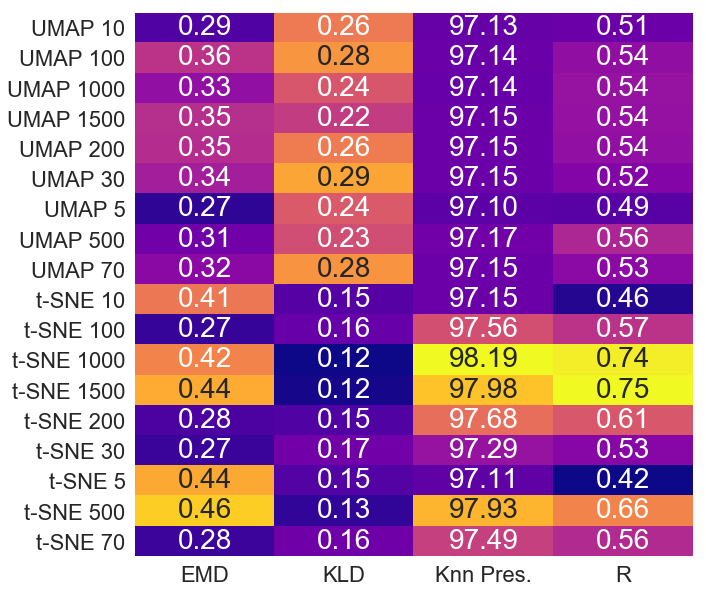

In [96]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(retina_norm, annot=retina_sum, cmap='plasma', robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)

In [97]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])

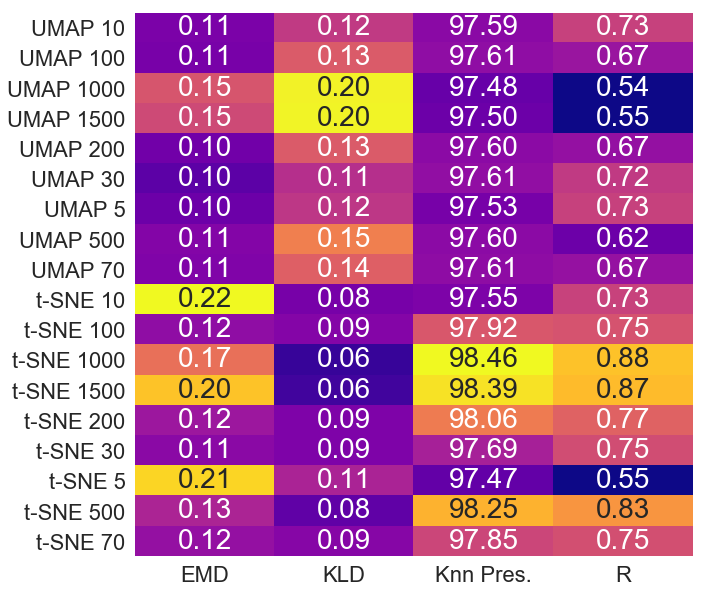

In [98]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(colon_norm, annot=colon_sum, cmap='plasma', robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)

In [100]:
colon_sum.to_csv('pymethods_out/colon_perplexity.csv', header=True, index=True)
retina_sum.to_csv('pymethods_out/retina_perplexity.csv', header=True, index=True)